# Análisis Exploratorio y Modelo RNA para Predicción de Rating de Vinos

In [1]:
import pandas as pd

df = pd.read_csv('/home/jordi/Documentos/Ribera/Curso_25_26/CEIABD/CEIABD_25_26/PROGRAMACION_IA_25_26/NOTEBOOKS DEL AULA/datasets/wines_SPA.csv')
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


## Información general del dataset

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


## Estadísticos descriptivos

In [3]:
df.describe(include='all')

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
count,7500,7500,7498,7500.000000,7500.000000,7500,7500,7500.000000,6955,6331.000000,6331.000000
unique,480,847,71,NaN,NaN,1,76,NaN,21,NaN,NaN
top,Contino,Reserva,2011,NaN,NaN,Espana,Rioja,NaN,Rioja Red,NaN,NaN
freq,457,467,1190,NaN,NaN,7500,2440,NaN,2357,NaN,NaN
mean,NaN,NaN,NaN,4.254933,451.109067,NaN,NaN,60.095822,NaN,4.158427,2.946612
std,NaN,NaN,NaN,0.118029,723.001856,NaN,NaN,150.356676,NaN,0.583352,0.248202
min,NaN,NaN,NaN,4.200000,25.000000,NaN,NaN,4.990000,NaN,2.000000,1.000000
25%,NaN,NaN,NaN,4.200000,389.000000,NaN,NaN,18.900000,NaN,4.000000,3.000000
50%,NaN,NaN,NaN,4.200000,404.000000,NaN,NaN,28.530000,NaN,4.000000,3.000000
75%,NaN,NaN,NaN,4.200000,415.000000,NaN,NaN,51.350000,NaN,5.000000,3.000000


## Valores nulos

In [4]:
df.isna().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

## Matriz de correlación numérica

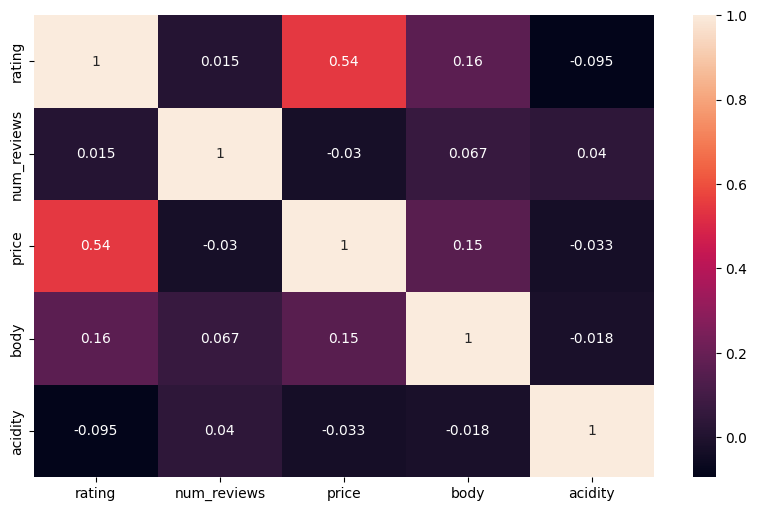

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
plt.show()

## Preprocesamiento de datos

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf

X = df.drop('rating', axis=1)
X = X.fillna({
    col: "Desconocido" for col in X.select_dtypes(include='object')
})
X = X.fillna({
    col: X[col].median() for col in X.select_dtypes(include=['int64','float64'])
})

y = df['rating']

cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()

preprocess = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', StandardScaler(), num_cols)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


2025-11-25 17:01:54.524448: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-25 17:01:54.632056: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-25 17:01:57.532036: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 4664 to 7270
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       6000 non-null   object 
 1   wine         6000 non-null   object 
 2   year         6000 non-null   object 
 3   num_reviews  6000 non-null   int64  
 4   country      6000 non-null   object 
 5   region       6000 non-null   object 
 6   price        6000 non-null   float64
 7   type         6000 non-null   object 
 8   body         6000 non-null   float64
 9   acidity      6000 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 515.6+ KB


## Modelo RNA

In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Pipeline with KerasRegressor deprecated; manual fit
X_train_p = preprocess.fit_transform(X_train)
X_test_p = preprocess.transform(X_test)

history = model.fit(X_train_p, y_train, epochs=20, batch_size=32, validation_split=0.2)


I0000 00:00:1764086518.545950  228030 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2001 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Epoch 1/20


2025-11-25 17:02:00.481894: I external/local_xla/xla/service/service.cc:163] XLA service 0x13c66c70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-25 17:02:00.481926: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-11-25 17:02:00.519046: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-25 17:02:00.731736: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002
2025-11-25 17:02:00.769453: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-25 17:02:02.3657

 41/150 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.5998

I0000 00:00:1764086524.565266  228393 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 3.0849 - val_loss: 0.0598
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0343 - val_loss: 0.0265
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0124 - val_loss: 0.0189
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0048 - val_loss: 0.0184
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0029 - val_loss: 0.0162
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0021 - val_loss: 0.0166
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0021 - val_loss: 0.0154
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0020 - val_loss: 0.0177
Epoch 9/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0022 - val_loss: 0.0165
Epoch 10/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0025 - val_loss: 0.0167
Epoch 11/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0026 - val_loss: 0.0165
Epoch 12/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 

## Guardar el modelo y el preprocesado

In [8]:

import pickle

# Guardar el preprocesador
with open("preprocess.pkl", "wb") as f:
    pickle.dump(preprocess, f)

# Guardar el modelo entrenado
model.save("rna_wine_model_v3.keras", save_format="keras")


print("Modelos guardados correctamente.")


Modelos guardados correctamente.


## Evaluación del modelo

In [9]:
from sklearn.metrics import mean_squared_error

preds = model.predict(X_test_p)
mse = mean_squared_error(y_test, preds)
mse

47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step


0.02053458584668384